## **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields

- Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu

In [2]:
df=pd.read_csv("Delhivery_data.csv")

In [3]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [7]:
missing_source = df.loc[df['source_name'].isnull(),'source_center'].unique()
missing_source

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [8]:
for i in missing_source:
    name= df.loc[df['source_center']==i, 'source_name'].unique()
    if pd.isna(name):
        print(f'Source name not found for {i}')

Source name not found for IND342902A1B
Source name not found for IND577116AAA
Source name not found for IND282002AAD
Source name not found for IND465333A1B
Source name not found for IND841301AAC
Source name not found for IND509103AAC
Source name not found for IND126116AAA
Source name not found for IND331022A1B
Source name not found for IND505326AAB
Source name not found for IND852118A1B


In [9]:
missing_destination = df.loc[df['destination_name'].isnull(),'destination_center'].unique()
missing_destination

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [10]:
for i in missing_destination:
    dest_name= df.loc[df['destination_center']==i, 'destination_name'].unique()
    if pd.isna(dest_name):
        print(f'Destination name not found for {i}')

Destination name not found for IND342902A1B
Destination name not found for IND577116AAA
Destination name not found for IND282002AAD
Destination name not found for IND465333A1B
Destination name not found for IND841301AAC
Destination name not found for IND505326AAB
Destination name not found for IND852118A1B
Destination name not found for IND126116AAA
Destination name not found for IND509103AAC
Destination name not found for IND221005A1A
Destination name not found for IND250002AAC
Destination name not found for IND331001A1C
Destination name not found for IND122015AAC


Source_name and destination_name columns have null values. Unable able to impute values using source_center and destination_center data as there is no known data for those source and destination centers.

So Removing all the rows that have null values as we cant work with rows that dont have source and destination names.

In [11]:
df.dropna(how='any',inplace=True)
df.reset_index(inplace=True)

In [12]:
# Changing the data types of columns 'data' and 'route_type' to category.

df['data'] =  df['data'].astype('category')
df['route_type'] =  df['route_type'].astype('category')

In [13]:
# Changing data types of columns od_start_time and od_end_time to datetime.

df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])
df['trip_creation_time']  =  pd.to_datetime(df['trip_creation_time'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           144316 non-null  int64         
 1   data                            144316 non-null  category      
 2   trip_creation_time              144316 non-null  datetime64[ns]
 3   route_schedule_uuid             144316 non-null  object        
 4   route_type                      144316 non-null  category      
 5   trip_uuid                       144316 non-null  object        
 6   source_center                   144316 non-null  object        
 7   source_name                     144316 non-null  object        
 8   destination_center              144316 non-null  object        
 9   destination_name                144316 non-null  object        
 10  od_start_time                   144316 non-null  datetim

## Merging rows to make the dataset compact without loosing data 

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now let's think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

Grouping by 'trip_uuid', 'source_center' and 'destination_center'.

And taking the sums of 'segment_actual_time', 'segment_osrm_distance' and 'segment_osrm_time' for each group.

In [15]:
df_grouped = df.groupby(by=['trip_uuid','source_center','destination_center'],as_index=False).agg({

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

    })

In [16]:
df_grouped.rename(columns={'segment_actual_time':'total_segment_actual_time', 'segment_osrm_distance':'total_segment_osrm_distance','segment_osrm_time':'total_segment_osrm_time'},inplace=True)

In [17]:
df_grouped.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,total_segment_actual_time,total_segment_osrm_distance,total_segment_osrm_time
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
5,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
6,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
7,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,59.530350,147.0,46.0,63.6461,147.0,63.6461,45.0
8,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,485.0,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0
9,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,26.600536,63.0,27.0,29.5696,63.0,29.5697,26.0


In [18]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            26222 non-null  category      
 1   trip_creation_time              26222 non-null  datetime64[ns]
 2   route_schedule_uuid             26222 non-null  object        
 3   route_type                      26222 non-null  category      
 4   trip_uuid                       26222 non-null  object        
 5   source_center                   26222 non-null  object        
 6   source_name                     26222 non-null  object        
 7   destination_center              26222 non-null  object        
 8   destination_name                26222 non-null  object        
 9   od_start_time                   26222 non-null  datetime64[ns]
 10  od_end_time                     26222 non-null  datetime64[ns]
 11  st

In [19]:
# Creating a feature of the time difference of trip start and end time.

df_grouped['od_total_time']=(df_grouped['od_end_time']-df_grouped['od_start_time']).dt.total_seconds()/60

In [20]:
trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_total_time' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'total_segment_actual_time' : 'sum',
    'total_segment_osrm_distance' : 'sum',
    'total_segment_osrm_time' : 'sum',
    }

In [21]:
trip=df_grouped.groupby('trip_uuid',as_index=False).agg(trip_dict)

In [22]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_total_time                   14787 non-null  float64       
 11  ac

We can observe that original data with more than 1.45 lakh rows are reduced to less than 15k rows.

In [23]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,total_segment_actual_time,total_segment_osrm_distance,total_segment_osrm_time
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


## Splitting source_name and destination_name to create new features 

In [24]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [25]:
def place_to_state(x):
    # transforming  "kanpur_central_h_6 (uttar pradesh)" into "uttar pradesh)".
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

In [26]:
def place_to_city(x):
     # transforming  "kanpur_central_h_6 (uttar pradesh)" into "kanpur_central_h_6"
    city=x.split(' (')[0]
    # transforming "kanpur_central_h_6" to "kanpur"
    city=city.split('_')[0]
    
    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar','PNQ Rahatani DPC',
    #  'HBR Layout PC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'

    return city

def place_to_city_place(x):

    # We will remove state from the string
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and also a place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]

In [27]:
def place_to_code(x):
    # We will remove state from the string
    x = x.split(' (')[0]
    
    # selecting the place code from the string with the help of its length.
    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [28]:
trip['source_state'] = trip['source_name'].apply(place_to_state)
trip['source_city']  = trip['source_name'].apply(place_to_city)
trip['source_place'] = trip['source_name'].apply(place_to_city_place)
trip['source_code']  = trip['source_name'].apply(place_to_code)

In [29]:
trip['destination_state'] = trip['destination_name'].apply(place_to_state)
trip['destination_city']  = trip['destination_name'].apply(place_to_city)
trip['destination_place'] = trip['destination_name'].apply(place_to_city_place)
trip['destination_code']  = trip['destination_name'].apply(place_to_code)

## Splitting trip_creation_date to create new features

In [30]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [31]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


## EDA on the final dataset 

In [32]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2


In [33]:
trip.shape

(14787, 32)

In [34]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_total_time                   14787 non-null  float64       
 11  ac

In [35]:
trip['trip_creation_time'].min(),trip['trip_creation_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-03 23:59:42.701692'))

The data given to us is of a month duration.

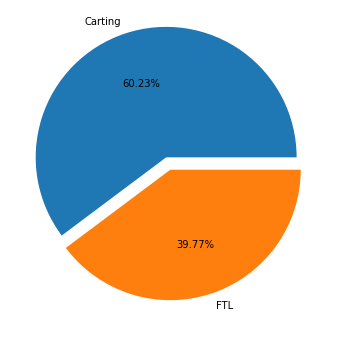

In [36]:
trip_route_type=trip.groupby('route_type')['trip_uuid'].nunique().reset_index()
trip_route_type['percentage']= trip_route_type['trip_uuid']/(trip_route_type['trip_uuid'].sum())*100

plt.figure(figsize=(8,6))
plt.pie(x=trip_route_type['percentage'],labels=trip_route_type['route_type'],explode=[0.1,0],autopct='%.2f%%')
plt.show()

More than 60% of the trips are for carting.

In [37]:
trip_source_state= trip.groupby(['source_state'])['trip_uuid'].nunique().reset_index()
trip_source_state['percentage'] = trip_source_state['trip_uuid']/(trip_source_state['trip_uuid'].sum())*100
trip_source_state= trip_source_state.sort_values(by='trip_uuid', ascending= False)

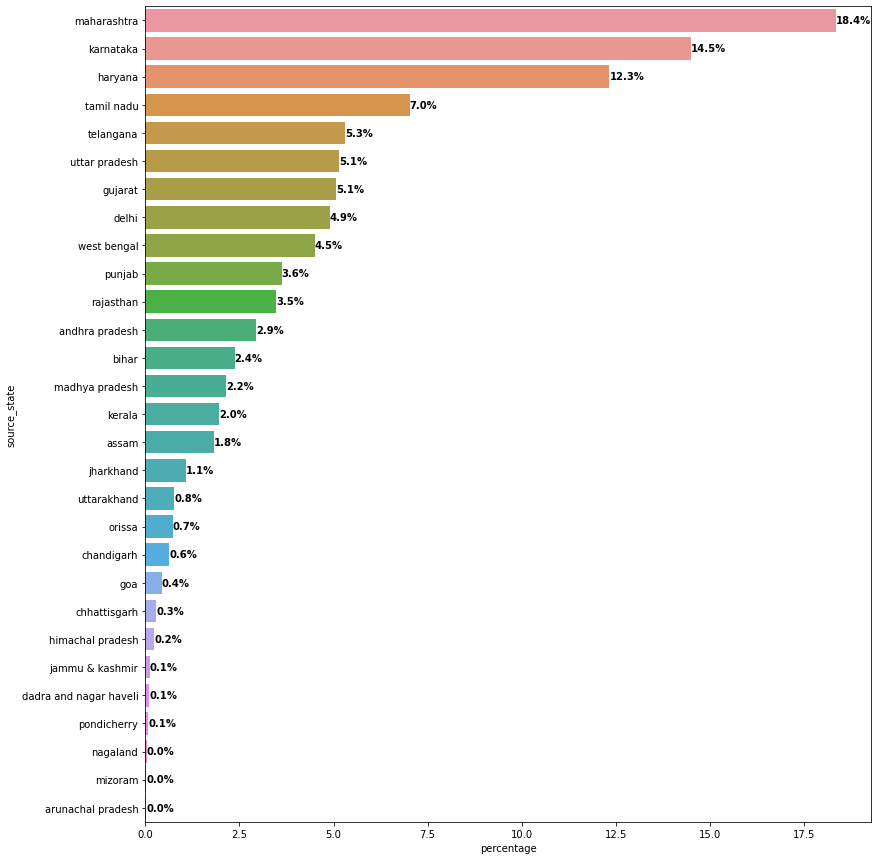

In [38]:
plt.figure(figsize=(13,15))
ax=sns.barplot(y= trip_source_state['source_state'] ,x= trip_source_state['percentage'])
# Annotating each bar with its percentage value
for index, value in enumerate(trip_source_state['percentage']):
    ax.text(value, index, f'{value:.1f}%', ha='left', va='center', color='black', fontweight='bold')
plt.show()

Most orders are sourced from the states Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana.

In [39]:
trip_destination_state= trip.groupby(['destination_state'])['trip_uuid'].nunique().reset_index()
trip_destination_state['percentage'] = trip_destination_state['trip_uuid']/(trip_destination_state['trip_uuid'].sum())*100
trip_destination_state= trip_destination_state.sort_values(by='trip_uuid', ascending= False)

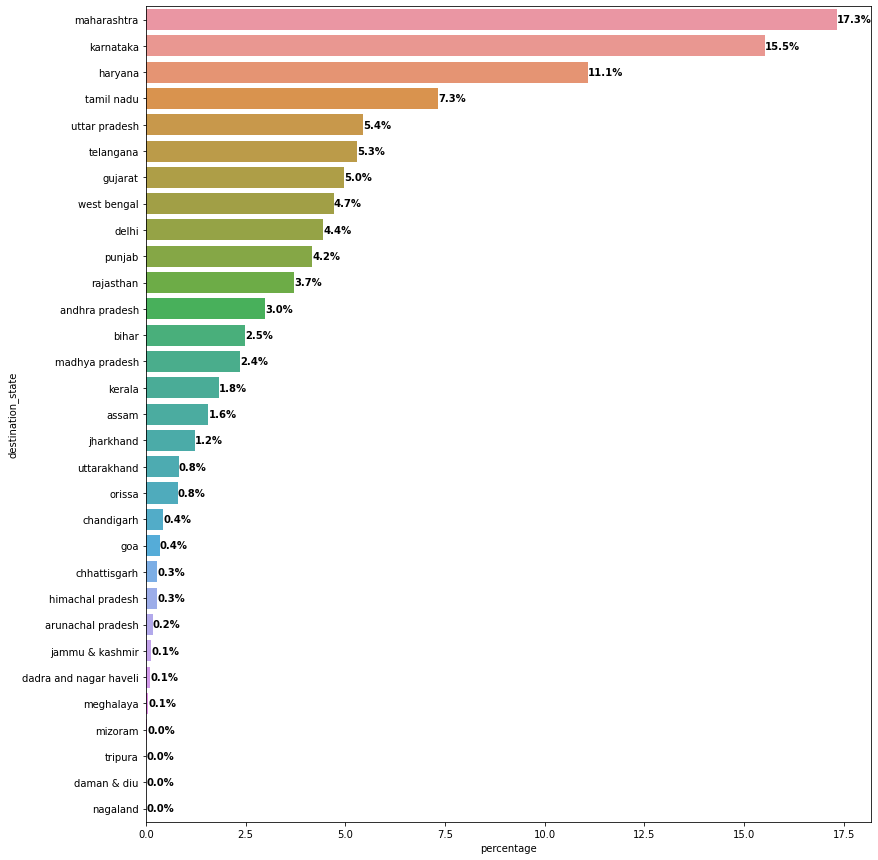

In [40]:
plt.figure(figsize=(13,15))
ax=sns.barplot(y= trip_destination_state['destination_state'] ,x= trip_destination_state['percentage'])
# Annotating each bar with its percentage value
for index, value in enumerate(trip_destination_state['percentage']):
    ax.text(value, index, f'{value:.1f}%', ha='left', va='center', color='black', fontweight='bold')
plt.show()

Most orders are destined to Maharashtra, Karnataka followed by Haryana, Tamil Nadu, Telangana.

## Hypothesis testing and Visual analysis

### Comparing 'od_total_time' and 'start_scan_to_end_scan' 

In [41]:
trip[['od_total_time','start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14787.000000,14787.000000
mean,530.313517,529.429025
std,658.415490,658.254936
min,23.461468,23.000000
25%,149.698496,149.000000
50%,279.710750,279.000000
75%,633.537697,632.000000
max,7898.551955,7898.000000


From the above initial comparision, total trip time and start_scan_to_end_scan seems to be very similar.

So lets do Hypothesis testing to find out whether they are indeed same or not.

Null hypothesis (H0) : od_total_time(total trip time) & start_scan_to_end_scan(expected trip time) are same.

Alternate hypothesis (Ha) : od_total_time(total trip time) & start_scan_to_end_scan(expected trip time) are different.

Let's set alpha as 0.05


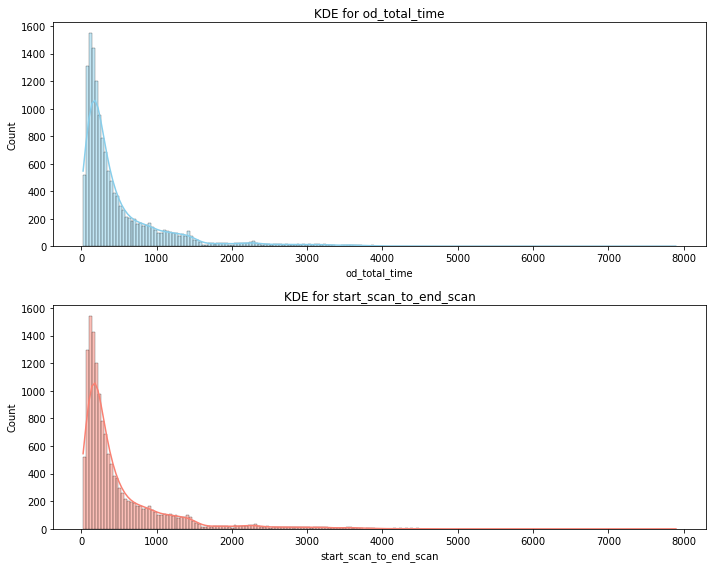

In [42]:
# To check whether these two are same or different we can conduct a 2-sample T-test.
# But for this the basic assumptions has to be satisfied.

# So let's check whether the data is following a normal distribution or not using qq plot and a kde plot.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=trip, x='od_total_time', kde=True , ax=axes[0], fill=True, color='skyblue')
axes[0].set_title('KDE for od_total_time')

sns.histplot(data=trip, x='start_scan_to_end_scan', kde=True, ax=axes[1], fill=True, color='salmon')
axes[1].set_title('KDE for start_scan_to_end_scan')

plt.tight_layout()

The above plots doesnt seems to be normal distribution. So let's confirm the same with qq plots.

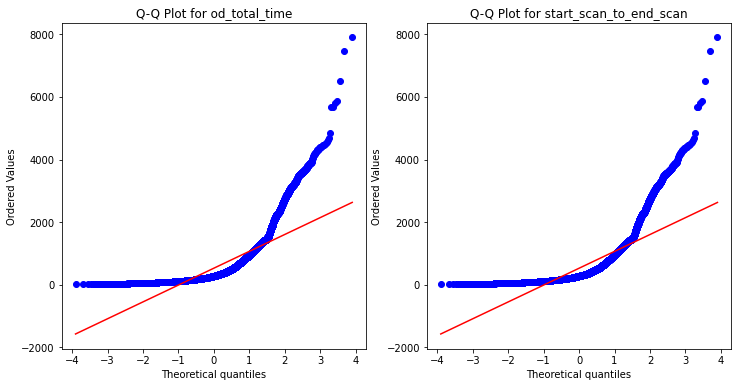

In [43]:
# Let's plot q-q plot for columns 'od_total_time' and 'start_scan_to_end_scan'

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
stats.probplot(trip['od_total_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for od_total_time')

plt.subplot(1,2,2)
stats.probplot(trip['start_scan_to_end_scan'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for start_scan_to_end_scan')
plt.show()

From the above Q-Q plots we can deduce that the above data is not following a normal distribution.

So, we can't conduct 'Two-sample T-test' instead we can do the Mann-Whitney U test.

In [44]:
test_stat,p = mannwhitneyu(trip['od_total_time'],trip['start_scan_to_end_scan'])
print("P-Value :", p)
if p<0.05:
    print("The samples are not similar.")
else:
    print("The samples are similar.")

P-Value : 0.7809958014596654
The samples are similar.


#### As the P-value is greater than the significance level, we can conclude that both 'od_total_time' and 'start_scan_to_end_scan' are similar.

### Comparing actual_time aggregated value and OSRM time aggregated value

In [45]:
trip[['actual_time','osrm_time']].describe()

,actual_time,osrm_time
count,14787.000000,14787.000000
mean,356.306012,160.990938
std,561.517936,271.459495
min,9.000000,6.000000
25%,67.000000,29.000000
50%,148.000000,60.000000
75%,367.000000,168.000000
max,6265.000000,2032.000000


From the above initial comparision 'actual_time' and 'osrm_time' seems to be very different. Actual time seems to be greater than the osrm_time.

So let's do Hypothesis testing to find out whether they are same or not.

Null hypothesis (H0) : actual_time aggregated value & osrm_time aggregated value are same.

Alternate hypothesis (Ha) : actual_time aggregated value & osrm_time aggregated value are different.

Let's set alpha as 0.05

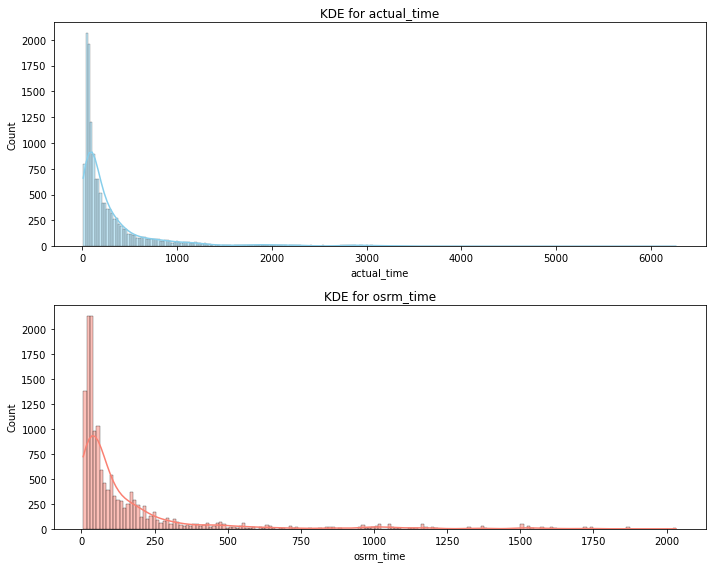

In [46]:
# To check whether these two are same or different we can conduct a 2-sample T-test.
# But for this the basic assumptions has to be satisfied.

# So let's check whether the data is following a normal distribution or not using qq plot and a kde plot.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=trip, x='actual_time', kde=True , ax=axes[0], fill=True, color='skyblue')
axes[0].set_title('KDE for actual_time')

sns.histplot(data=trip, x='osrm_time', kde=True, ax=axes[1], fill=True, color='salmon')
axes[1].set_title('KDE for osrm_time')

plt.tight_layout()

The above plots doesnt seems to be normal distribution. So let's confirm the same with qq plots.

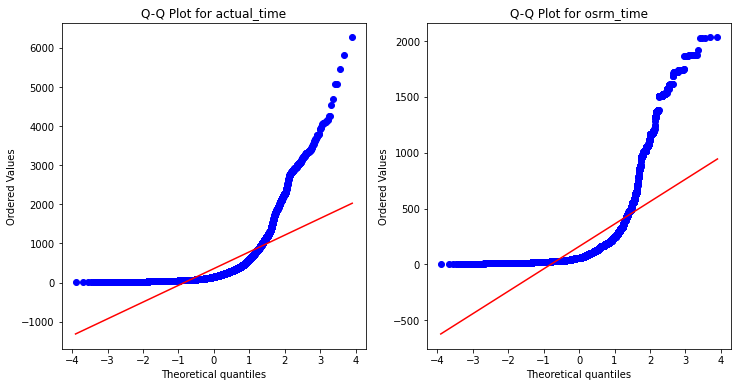

In [47]:
# Let's plot q-q plot for columns 'actual_time' and 'osrm_time'

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
stats.probplot(trip['actual_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for actual_time')

plt.subplot(1,2,2)
stats.probplot(trip['osrm_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for osrm_time')
plt.show()

From the above Q-Q plots we can deduce that the above data is not following a normal distribution.

So, we can't conduct 'Two-sample T-test' instead we can do the Mann-Whitney U test.

In [48]:
test_stat,p = mannwhitneyu(trip['actual_time'],trip['osrm_time'])
print("P-Value :", p)
if p<0.05:
    print("The samples are not similar.")
else:
    print("The samples are similar.")

P-Value : 0.0
The samples are not similar.


In [49]:
# As the samples are not similar, lets perform a 'one-tailed' Mann-Whitney U test
# to find whether 1 data is greater or less than the other dataset.

test_stat,p = mannwhitneyu(trip['actual_time'],trip['osrm_time'], alternative ='greater')
print("P-Value :", p)
if p<0.05:
    print("actual_time is greater than osrm_time")
else:
    print("The samples are similar.")

P-Value : 0.0
actual_time is greater than osrm_time


#### As the P-value is less than the significance level, we can conclude that 'actual_time' is greater than the 'osrm_time'. 

### Comparing actual_time aggregated value and segment_actual_time aggregated value

In [50]:
trip[['actual_time','total_segment_actual_time']].describe()

,actual_time,total_segment_actual_time
count,14787.000000,14787.000000
mean,356.306012,353.059174
std,561.517936,556.365911
min,9.000000,9.000000
25%,67.000000,66.000000
50%,148.000000,147.000000
75%,367.000000,364.000000
max,6265.000000,6230.000000


From the above initial comparision 'actual_time' and 'total_segment_actual_time' seems to be similar.

So let's do Hypothesis testing to find out whether they are indeed same or not.

Null hypothesis (H0) : actual_time aggregated value & total_segment_actual_time are same.

Alternate hypothesis (Ha) : actual_time aggregated value & total_segment_actual_time are different.

Let's set alpha as 0.05

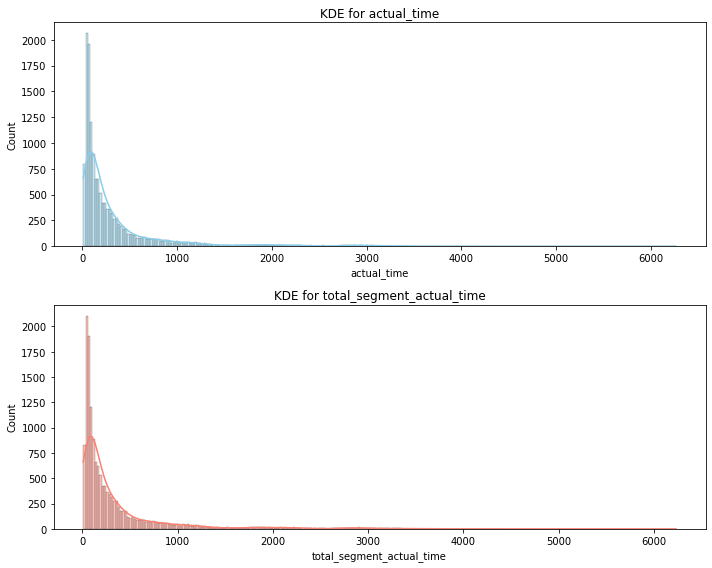

In [51]:
# To check whether these two are same or different we can conduct a 2-sample T-test.
# But for this the basic assumptions has to be satisfied.

# So let's check whether the data is following a normal distribution or not using qq plot and a kde plot.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=trip, x='actual_time', kde=True , ax=axes[0], fill=True, color='skyblue')
axes[0].set_title('KDE for actual_time')

sns.histplot(data=trip, x='total_segment_actual_time', kde=True, ax=axes[1], fill=True, color='salmon')
axes[1].set_title('KDE for total_segment_actual_time')

plt.tight_layout()

The above plots doesnt seems to be normal distribution. So let's confirm the same with qq plots.

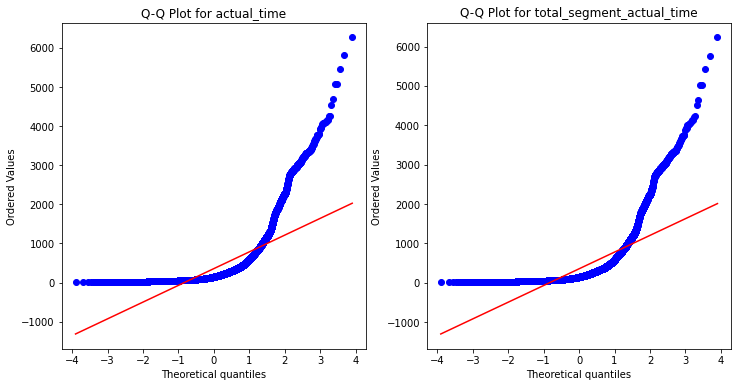

In [52]:
# Let's plot q-q plot for columns 'actual_time' and 'total_segment_actual_time'

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
stats.probplot(trip['actual_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for actual_time')

plt.subplot(1,2,2)
stats.probplot(trip['total_segment_actual_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for total_segment_actual_time')
plt.show()

From the above Q-Q plots we can deduce that the above data is not following a normal distribution.

So, we can't conduct 'Two-sample T-test' instead we can do the Mann-Whitney U test.

In [53]:
test_stat,p = mannwhitneyu(trip['actual_time'],trip['total_segment_actual_time'])
print("P-Value :", p)
if p<0.05:
    print("The samples are not similar.")
else:
    print("The samples are similar.")

P-Value : 0.41578601931625214
The samples are similar.


#### As the P-value is greater than the significance level, we can conclude that both 'actual_time' and 'total_segment_actual_time' are similar. 

### Comparing osrm_distance aggregated value and segment_osrm_distance aggregated value 

In [54]:
trip[['osrm_distance','total_segment_osrm_distance']].describe()

,osrm_distance,total_segment_osrm_distance
count,14787.000000,14787.000000
mean,203.887411,222.705466
std,370.565564,416.846279
min,9.072900,9.072900
25%,30.756900,32.578850
50%,65.302800,69.784200
75%,206.644200,216.560600
max,2840.081000,3523.632400


From the above initial comparision 'osrm_distance' and 'total_segment_osrm_distance' seems to be similar.

So let's do Hypothesis testing to find out whether they are indeed same or not.

Null hypothesis (H0) : osrm_distance aggregated value & total_segment_osrm_distance are same.

Alternate hypothesis (Ha) : osrm_distance aggregated value & total_segment_osrm_distance are different.

Let's set alpha as 0.05

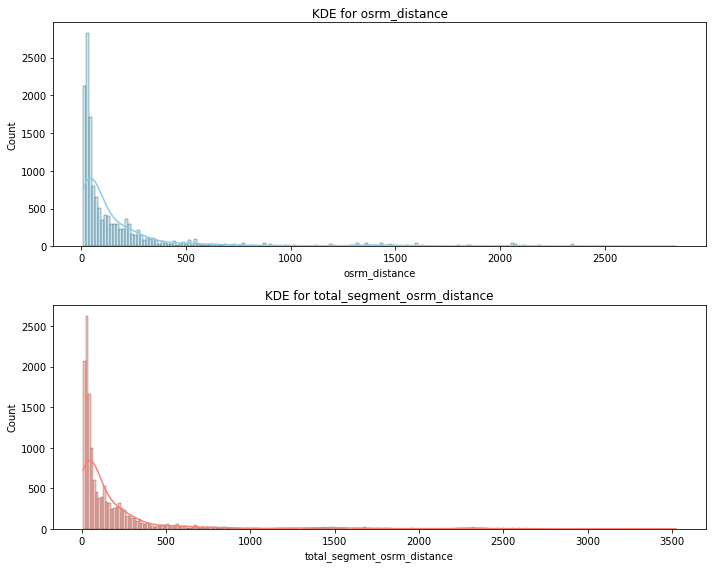

In [55]:
# To check whether these two are same or different we can conduct a 2-sample T-test.
# But for this the basic assumptions has to be satisfied.

# So let's check whether the data is following a normal distribution or not using qq plot and a kde plot.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=trip, x='osrm_distance', kde=True , ax=axes[0], fill=True, color='skyblue')
axes[0].set_title('KDE for osrm_distance')

sns.histplot(data=trip, x='total_segment_osrm_distance', kde=True, ax=axes[1], fill=True, color='salmon')
axes[1].set_title('KDE for total_segment_osrm_distance')

plt.tight_layout()

The above plots doesnt seems to be normal distribution. So let's confirm the same with qq plots.

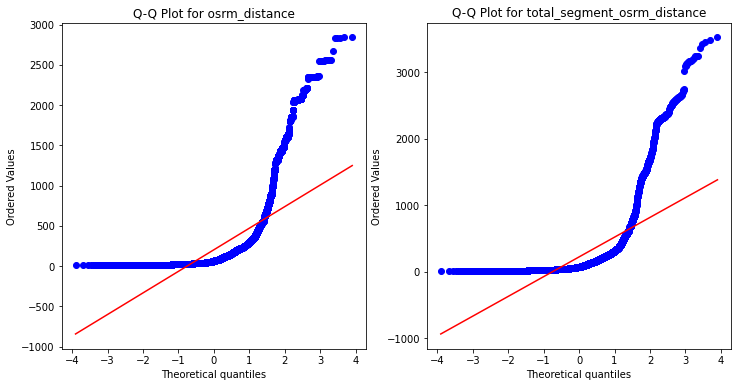

In [56]:
# Let's plot q-q plot for columns 'osrm_distance' and 'total_segment_osrm_distance'

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
stats.probplot(trip['osrm_distance'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for osrm_distance')

plt.subplot(1,2,2)
stats.probplot(trip['total_segment_osrm_distance'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for total_segment_osrm_distance')
plt.show()

From the above Q-Q plots we can deduce that the above data is not following a normal distribution.

So, we can't conduct 'Two-sample T-test' instead we can do the Mann-Whitney U test.

In [57]:
test_stat,p = mannwhitneyu(trip['osrm_distance'],trip['total_segment_osrm_distance'])
print("P-Value :", p)
if p<0.05:
    print("The samples are not similar.")
else:
    print("The samples are similar.")

P-Value : 1.000108765909207e-06
The samples are not similar.


In [58]:
# As the samples are not similar, lets perform a 'one-tailed' Mann-Whitney U test
# to find whether 1 data is greater or less than the other dataset.

test_stat,p = mannwhitneyu(trip['osrm_distance'],trip['total_segment_osrm_distance'], alternative ='less')
print("P-Value :", p)
if p<0.05:
    print("osrm_distance is less than total_segment_osrm_distance")
else:
    print("The samples are similar.")

P-Value : 5.000543829546035e-07
osrm_distance is less than total_segment_osrm_distance


#### As the P-value is less than the significance level, we can conclude that 'osrm_distance' is less than the 'total_segment_osrm_distance'.

### Comparing osrm time aggregated value and segment osrm time aggregated value

In [59]:
trip[['osrm_time','total_segment_osrm_time']].describe()

,osrm_time,total_segment_osrm_time
count,14787.000000,14787.000000
mean,160.990938,180.511598
std,271.459495,314.679279
min,6.000000,6.000000
25%,29.000000,30.000000
50%,60.000000,65.000000
75%,168.000000,184.000000
max,2032.000000,2564.000000


From the above initial comparision 'osrm_time' and 'total_segment_osrm_time' seems to be a bit different.

So let's do Hypothesis testing to find out whether they are indeed same or not.

Null hypothesis (H0) : osrm_time aggregated value & total_segment_osrm_time are same.

Alternate hypothesis (Ha) : osrm_time aggregated value & total_segment_osrm_time are different.

Let's set alpha as 0.05

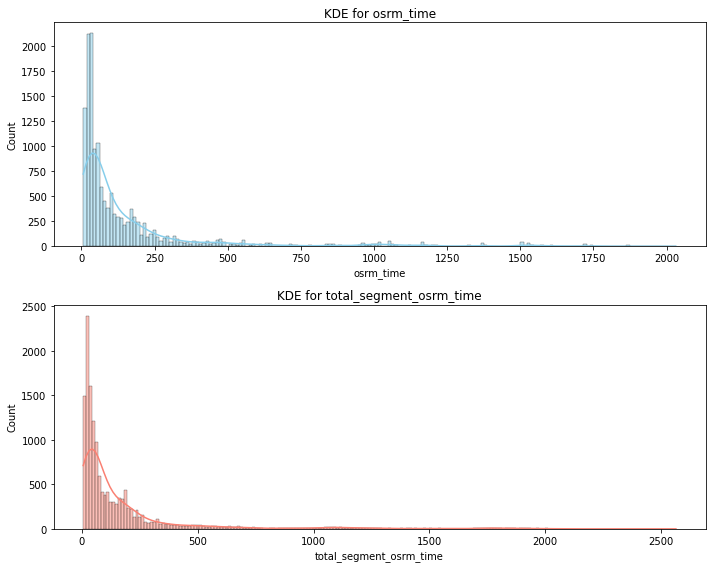

In [60]:
# To check whether these two are same or different we can conduct a 2-sample T-test.
# But for this the basic assumptions has to be satisfied.

# So let's check whether the data is following a normal distribution or not using qq plot and a kde plot.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=trip, x='osrm_time', kde=True , ax=axes[0], fill=True, color='skyblue')
axes[0].set_title('KDE for osrm_time')

sns.histplot(data=trip, x='total_segment_osrm_time', kde=True, ax=axes[1], fill=True, color='salmon')
axes[1].set_title('KDE for total_segment_osrm_time')

plt.tight_layout()

The above plots doesnt seems to be normal distribution. So let's confirm the same with qq plots.

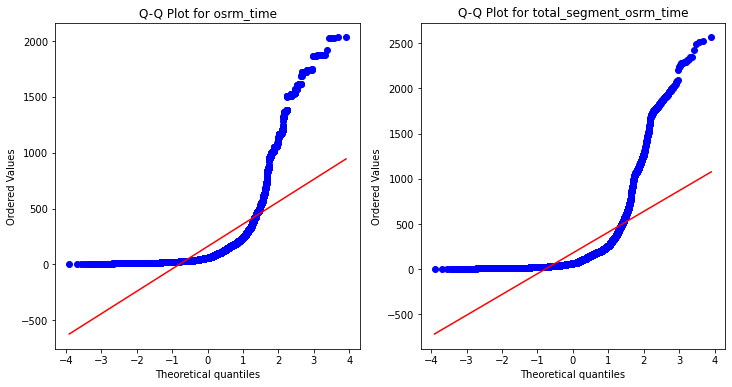

In [61]:
# Let's plot q-q plot for columns 'osrm_time' and 'total_segment_osrm_time'

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
stats.probplot(trip['osrm_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for osrm_time')

plt.subplot(1,2,2)
stats.probplot(trip['total_segment_osrm_time'], dist="norm", plot=sns.mpl.pyplot)
plt.title('Q-Q Plot for total_segment_osrm_time')
plt.show()

From the above Q-Q plots we can deduce that the above data is not following a normal distribution.

So, we can't conduct 'Two-sample T-test' instead we can do the Mann-Whitney U test.

In [62]:
test_stat,p = mannwhitneyu(trip['osrm_time'],trip['total_segment_osrm_time'])
print("P-Value :", p)
if p<0.05:
    print("The samples are not similar.")
else:
    print("The samples are similar.")

P-Value : 2.4893531591323577e-08
The samples are not similar.


In [63]:
# As the samples are not similar, lets perform a 'one-tailed' Mann-Whitney U test
# to find whether 1 data is greater or less than the other dataset.

test_stat,p = mannwhitneyu(trip['osrm_time'],trip['total_segment_osrm_time'], alternative ='less')
print("P-Value :", p)
if p<0.05:
    print("osrm_time is less than total_segment_osrm_time")
else:
    print("The samples are similar.")

P-Value : 1.2446765795661789e-08
osrm_time is less than total_segment_osrm_time


#### As the P-value is less than the significance level, we can conclude that 'osrm_time' is less than the 'total_segment_osrm_time'.

## Finding outliers in all the numerical data columns.

In [64]:
# Let's create a list of all the column names with numerical data.

numerical_col=trip.dtypes[(trip.dtypes== 'float64')].index.to_list()
numerical_col

['start_scan_to_end_scan',
 'od_total_time',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'total_segment_actual_time',
 'total_segment_osrm_distance',
 'total_segment_osrm_time']

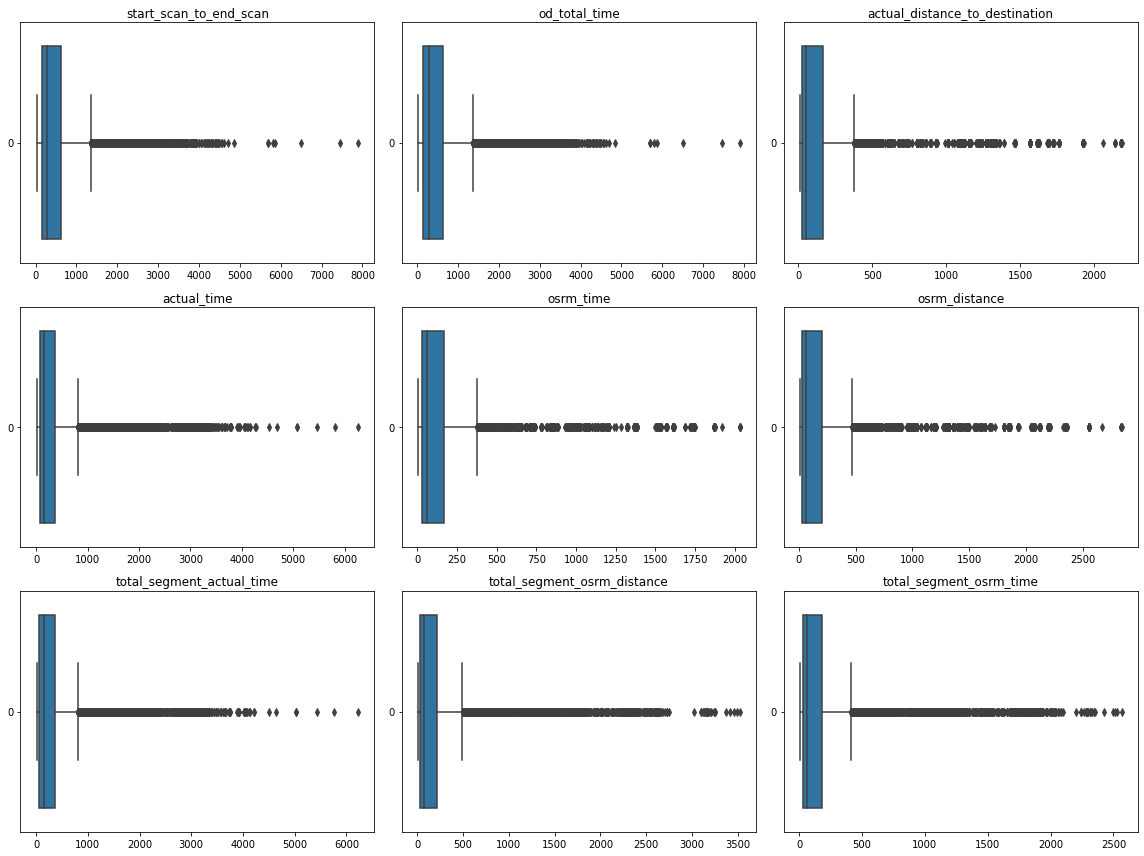

In [65]:
plt.figure(figsize=(16, 12))
for i in range(len(numerical_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(trip[numerical_col[i]],orient='h')
    plt.title(f"{numerical_col[i]}")
plt.tight_layout()

It can be observed that there are outliers in all the columns.

## Handling outliers using IQR method

In [66]:
# Calculating IQR 

Q1 = trip[numerical_col].quantile(0.25)
Q3 = trip[numerical_col].quantile(0.75)

IQR = Q3 - Q1

In [67]:
trip = trip[~((trip[numerical_col] < (Q1 - 1.5 * IQR)) | (trip[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

In [68]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,tamil nadu,chennai,vandalur,dc,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,haryana,faridabad,blbgarh,dc,2018,10,23,3,40,2
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tamil nadu,tirchchndr,shnmgprm,d,2018,10,23,3,40,2


## One-hot encoding for categorical column (route_type)

In [69]:
trip['route_type'].value_counts()

route_type
Carting    8812
FTL        3911
Name: count, dtype: int64

In [71]:
# As there are only 2 distinct values, they can be easily encoded using map function.

trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

In [72]:
trip['route_type'].value_counts()

route_type
1    8812
0    3911
Name: count, dtype: int64

## Standardizing the columns using StandardScaler

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scaler.fit(trip[numerical_col])

StandardScaler()

In [75]:
trip[numerical_col] = scaler.transform(trip[numerical_col])

In [76]:
trip[numerical_col]

,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,total_segment_actual_time,total_segment_osrm_distance,total_segment_osrm_time
0,-0.548546,-0.544839,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662
1,-0.861602,-0.861856,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225
2,1.552838,1.552812,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464
3,-0.513328,-0.510150,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288
4,-0.869428,-0.871585,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.246189,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349
12719,-1.018130,-1.017809,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038
12720,0.394533,0.395103,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276
12721,0.104957,0.107436,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092


## Recommendations:

- There is a significant difference in OSRM time, distance and actual values. Actual values are higher than the algorithm predicted values. Check for any discrepancies with the transporters team and check if the routing algorithm is equipped to handle these for optimum results. If not, design a better algorithm to predict time and distance more accurately.

- Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. Enhance the existing corridors by minimizing the transportation losses to improve the penetration in these areas.

- North, South and West Zones corridors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.

- From state's data, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.

- The data provided to us is of only a month duration. So, request for a more broader data to find the seasonality of the orders to determine the traffic distribution across different seasons.

- Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these states and to improve customers’ buying and delivery experience.